In [32]:
from src.utils.data_downloader import DATA_URL, check_downloaded_data, download_data
from src.data.preparation import bin_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_path = "../data/wine_quality.csv"
is_data_downloaded = check_downloaded_data(file_path=data_path)
if not is_data_downloaded:
    download_data(url=DATA_URL, file_path=data_path)

print("Data is ready for exploration.")

Data is ready for exploration.


In [10]:
# Load the data and glacing at its structure
wine_df = pd.read_csv(data_path, sep=";")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# Taking a look as its shape
wine_df.shape

(1599, 12)

In [12]:
# Checking the number of missing values in each column
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Checking the distribution of the target variable 'quality'
wine_df['quality'].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [15]:
# Basic description
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


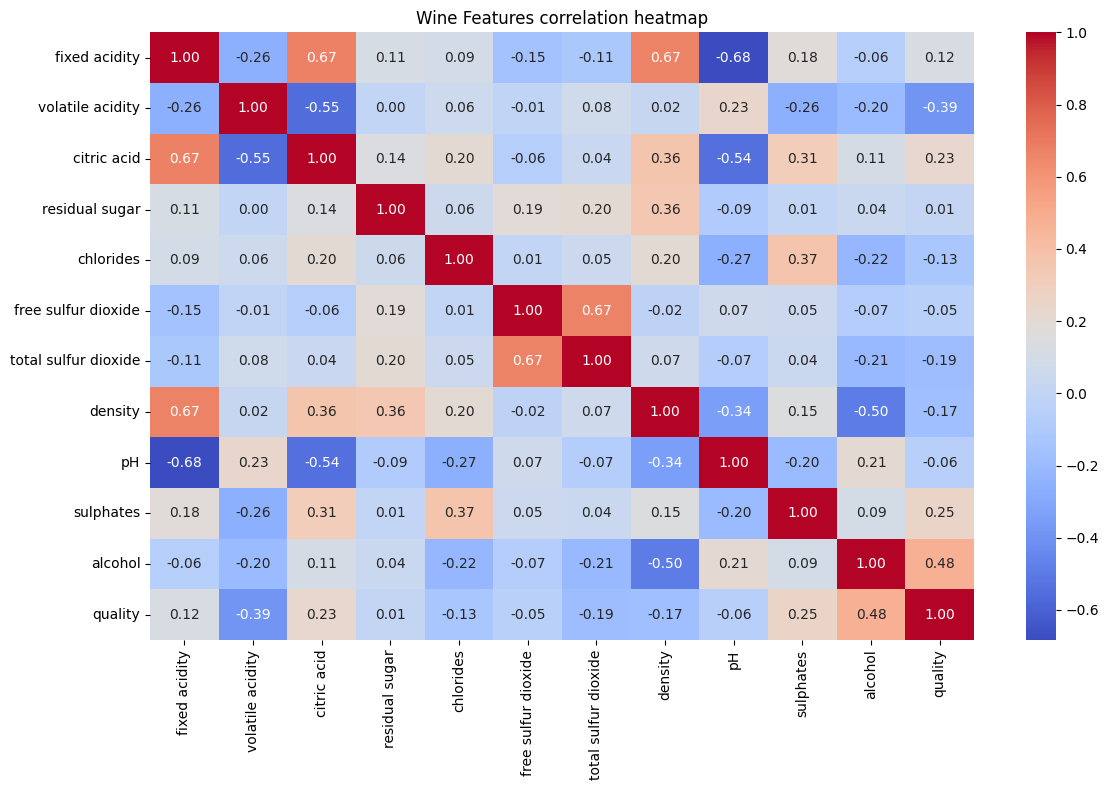

In [18]:
# Let's start finding out correlations
correlation = wine_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Wine Features correlation heatmap')
plt.tight_layout()
plt.show()

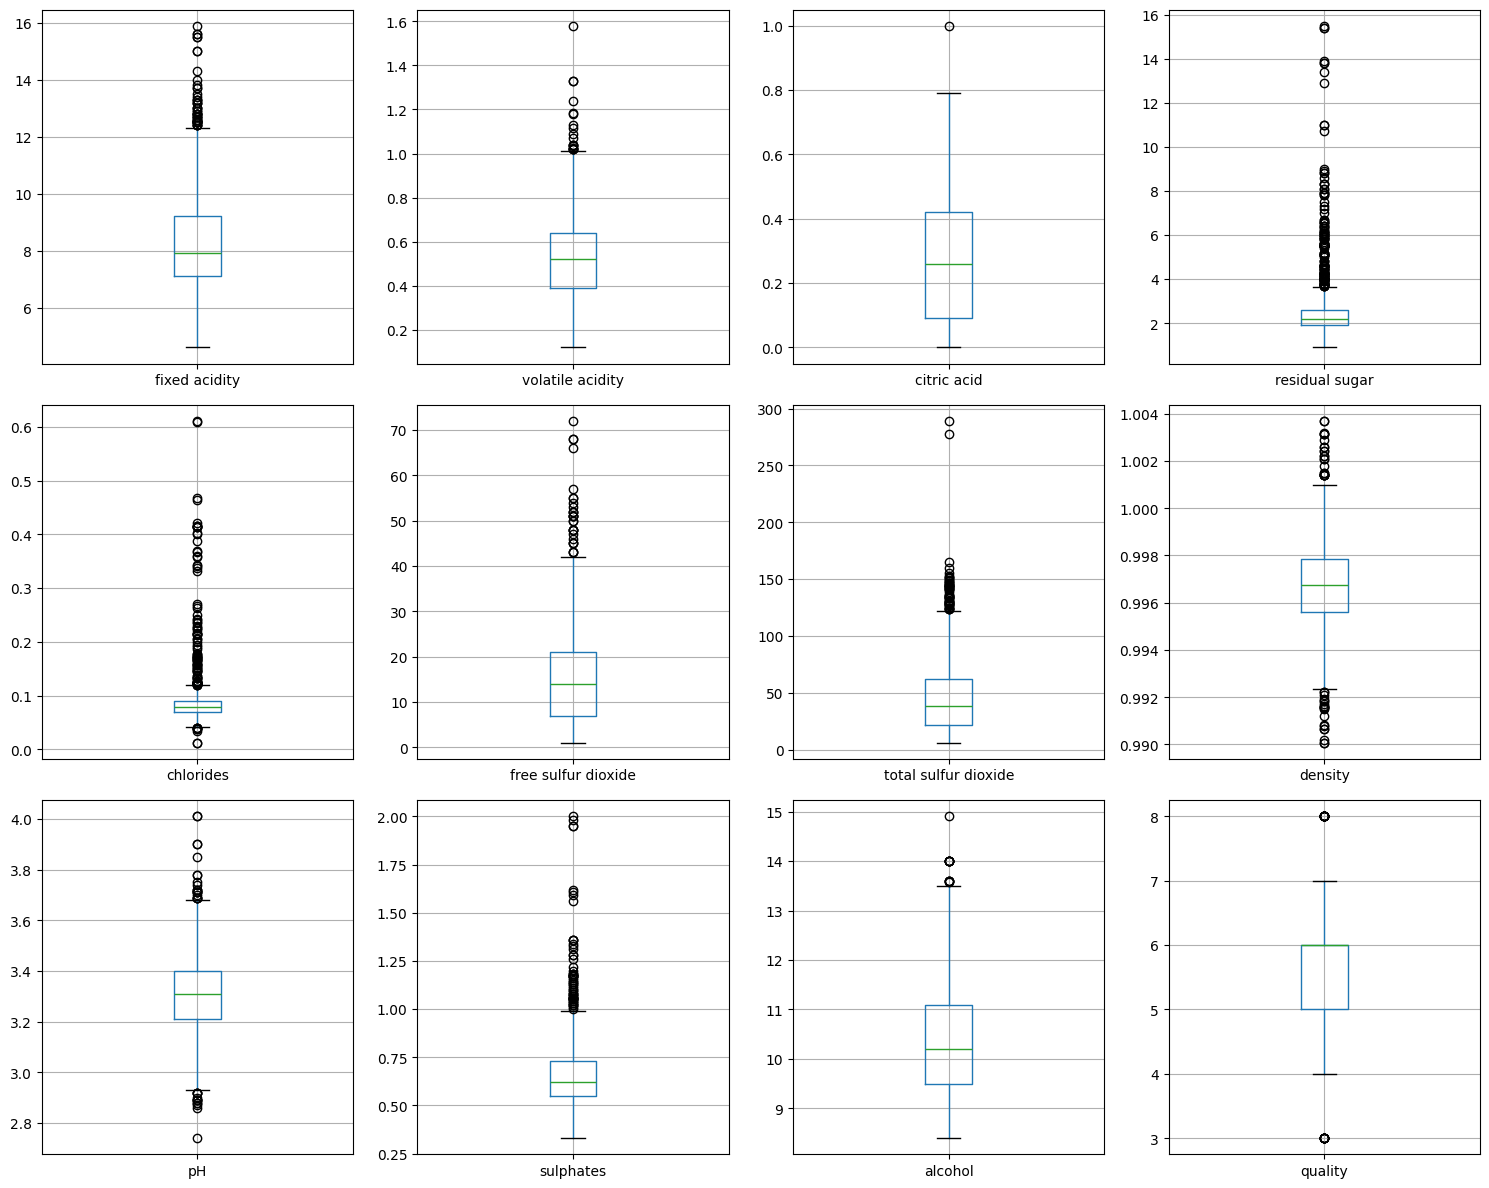

In [19]:
# a few higher correlations, but none are alarming. Let's proceed with further analysis.
# Let's check for outliers
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
for i, col in enumerate(wine_df.columns):
    ax = axes[i // 4, i % 4]
    wine_df.boxplot(column=col, ax=ax)
plt.tight_layout()
plt.show()

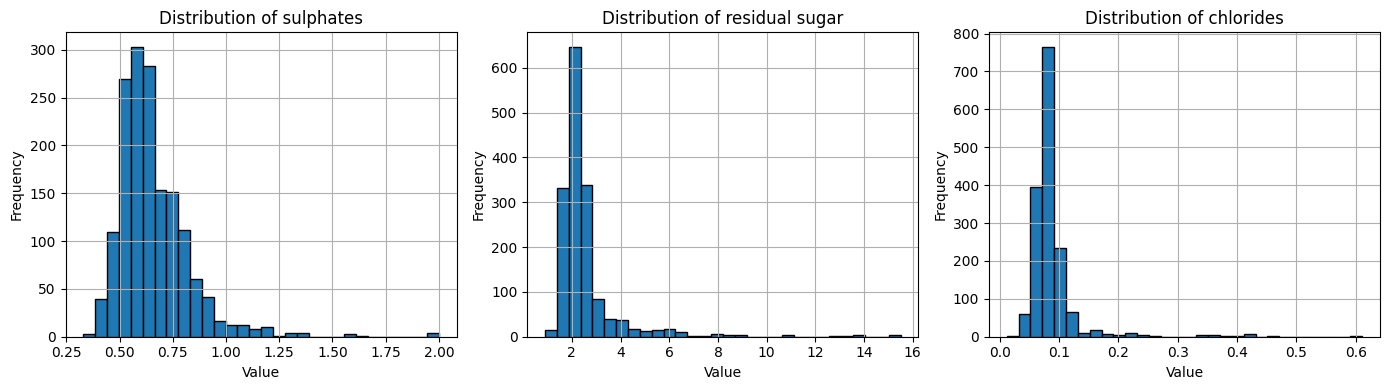

In [26]:
# Some concerning outliers were found: mainly 'sulphates', 'residual sugar', and 'chlorides'. 
# Further investigation is needed to decide how to handle them.
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
features = ['sulphates', 'residual sugar', 'chlorides']
for ax, feature in zip(axes, features):
    wine_df[feature].hist(ax=ax, bins=30, edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()


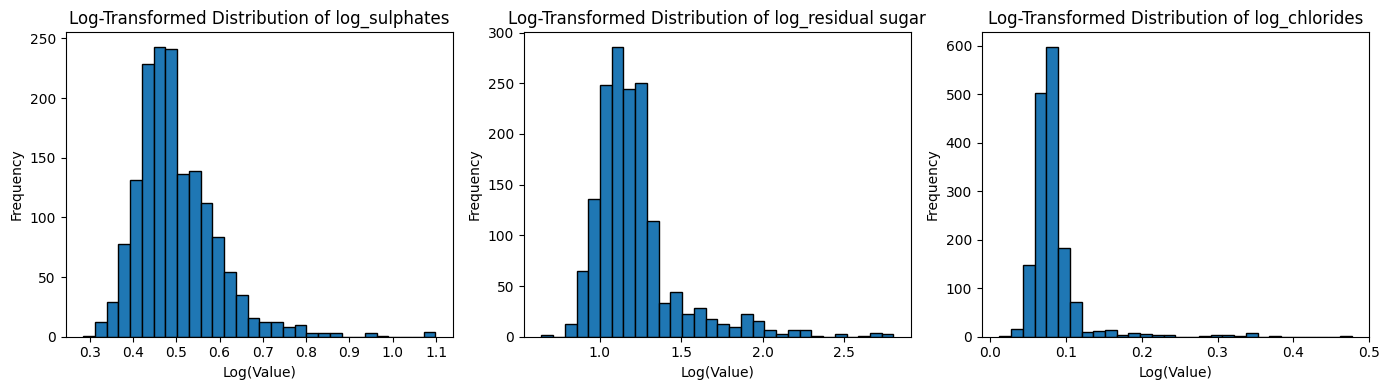

In [29]:
# looks like all three features are right-skewed.
# Let's apply a log transformation to see if it helps in normalizing the distributions.
for feature in features:
    wine_df[f'log_{feature}'] = np.log1p(wine_df[feature])

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, feature in zip(axes, features):
    ax.hist(wine_df[f'log_{feature}'], bins=30, edgecolor='black')
    ax.set_title(f'Log-Transformed Distribution of log_{feature}')
    ax.set_xlabel('Log(Value)')
    ax.set_ylabel('Frequency')
plt.tight_layout()

In [33]:
# let's not overthink it for now. Let's bin the data accordingly to the quality(3 to 9) in to low, medium and high quality. 

wine_df = bin_data(wine_df, 'quality', bins=[2, 5, 7, 10], labels=['low', 'medium', 'high'])
wine_df['quality_binned'].value_counts()

quality_binned
medium    837
low       744
high       18
Name: count, dtype: int64